In [1]:
import scipy.stats

import numpy as np

import matplotlib

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    From: https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

width, height = set_size(252, fraction=1.0)

font=9

matplotlib.rcParams.update({
    'font.size': font,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 300, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': font,
    'ytick.labelsize': font,
    'legend.fontsize': font,
})

import matplotlib.pyplot as plt

In [2]:
def exp_decay(i, eta_0, rate):
    return eta_0 * np.exp(-rate * i)

def exp_decay_periodic(i, eta_0, rate, periode):
    return exp_decay(i % periode, eta_0, rate)

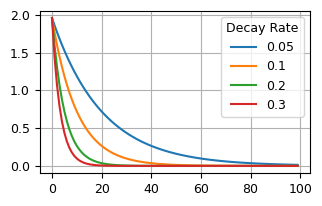

In [3]:
# impact of rate

x = np.arange(100)
eta_0 = 1.96

rates = [0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(width,height))
for rate in rates:
    y = [exp_decay(i, eta_0, rate) for i in x]
    plt.plot(x, y, label=f"{rate}")
plt.grid()
plt.legend(title="Decay Rate")
plt.show()

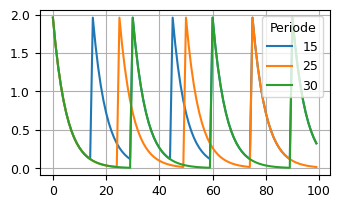

In [4]:
# impact of periode

eta_0 = 1.96
rate = 0.2
periodes = [15, 25, 30]
plt.figure()
for i, periode in enumerate(periodes):
    # plt.subplot(len(periodes), 1, i+1)
    y = [exp_decay_periodic(i, eta_0, rate, periode) for i in x]
    plt.plot(x, y, label=f"{periode}")
    plt.grid()
    plt.legend(title="Periode", loc="upper right")
plt.tight_layout()
plt.show()

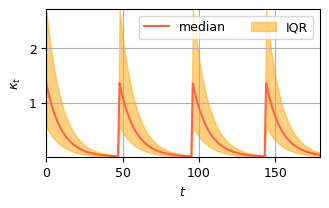

In [10]:
eta_0 = 1.96
rate = 0.1
periode = 48
x = np.arange(180)
eta_0_mean = scipy.stats.expon.mean(scale=eta_0)
eta_0_median = scipy.stats.expon.ppf(0.5, scale=eta_0)
eta_0_qbottom = scipy.stats.expon.ppf(0.25, scale=eta_0)
eta_0_qtop = scipy.stats.expon.ppf(0.75, scale=eta_0)


plt.figure()
y = exp_decay_periodic(x, eta_0_mean, rate, periode)
plt.plot(x, y_median, color="tomato", label="median")
y_median = exp_decay_periodic(x, eta_0_median, rate, periode)
y_bottom = exp_decay_periodic(x, eta_0_qbottom, rate, periode)
y_top = exp_decay_periodic(x, eta_0_qtop, rate, periode)
# plt.plot(x, y_median, label="median")
plt.fill_between(x, y_bottom, y_top, alpha=0.5, color="orange", label="IQR")
plt.xlabel(r"$t$")
plt.ylabel(r"$\kappa_t$")
plt.xlim(min(x), max(x))
plt.ylim(min(y_bottom), max(y_top))
plt.grid()
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("example-exp-decay.jpg")
plt.show()

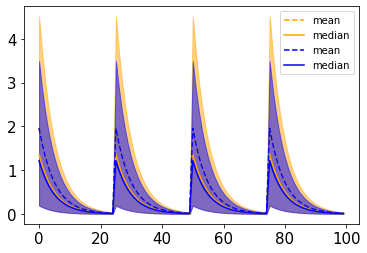

In [56]:
eta_0 = 1.96
rate = 0.2
periode = 25

plt.figure()

dist = scipy.stats.expon(scale=eta_0)

eta_0_mean = dist.mean()
eta_0_median = dist.ppf(0.5)
eta_0_qbottom = dist.ppf(0.1)
eta_0_qtop = dist.ppf(0.9)

y_mean = exp_decay_periodic(x, eta_0_mean, rate, periode)
y_median = exp_decay_periodic(x, eta_0_median, rate, periode)
y_bottom = exp_decay_periodic(x, eta_0_qbottom, rate, periode)
y_top = exp_decay_periodic(x, eta_0_qtop, rate, periode)

plt.plot(x, y, color="orange", linestyle="dashed", label="mean")
plt.plot(x, y_median, color="orange", label="median")
plt.fill_between(x, y_bottom, y_top, alpha=0.5, color="orange")

dist = scipy.stats.truncexpon(b=2.576, scale=eta_0)

eta_0_mean = dist.mean()
eta_0_median = dist.ppf(0.5)
eta_0_qbottom = dist.ppf(0.1)
eta_0_qtop = dist.ppf(0.9)

y_mean = exp_decay_periodic(x, eta_0_mean, rate, periode)
y_median = exp_decay_periodic(x, eta_0_median, rate, periode)
y_bottom = exp_decay_periodic(x, eta_0_qbottom, rate, periode)
y_top = exp_decay_periodic(x, eta_0_qtop, rate, periode)

plt.plot(x, y, color="blue", linestyle="dashed", label="mean")
plt.plot(x, y_median, color="blue", label="median")
plt.fill_between(x, y_bottom, y_top, alpha=0.5, color="blue")

plt.legend()
plt.show()

In [ ]:
# confidence interval normal distribution
# 90% 1.645
# 95% 1.960
# 99% 2.576

In [52]:
scipy.stats.expon.rvs(size=10, scale=eta_0, random_state)

array([2.78526431, 2.42028507, 0.14026686, 1.97972793, 1.48721418,
       0.96939401, 2.00749962, 3.40165955, 2.09583613, 0.3318558 ])

In [51]:
scipy.stats.truncexpon.mean(b=2.576, scale=eta_0)

1.5442580023626578

In [50]:
scipy.stats.truncexpon.mean(b=eta_0, scale=1)

0.6786530745011512

In [42]:
scipy.stats.expon.median(scale=eta_0)

1.3585684738974928

In [43]:
scipy.stats.expon.ppf(0.5, scale=eta_0)

1.3585684738974928

In [3]:
# cosine schedule
kappa_max = 1.96
kappa_min = 0.001
periode = 25
kappa_val = lambda i: kappa_min + 0.5 * (kappa_max - kappa_min) * (1 + np.cos(i/periode*np.pi))
y_cosine_25 = [kappa_val(i) for i in range(100)]

<IPython.core.display.Javascript object>


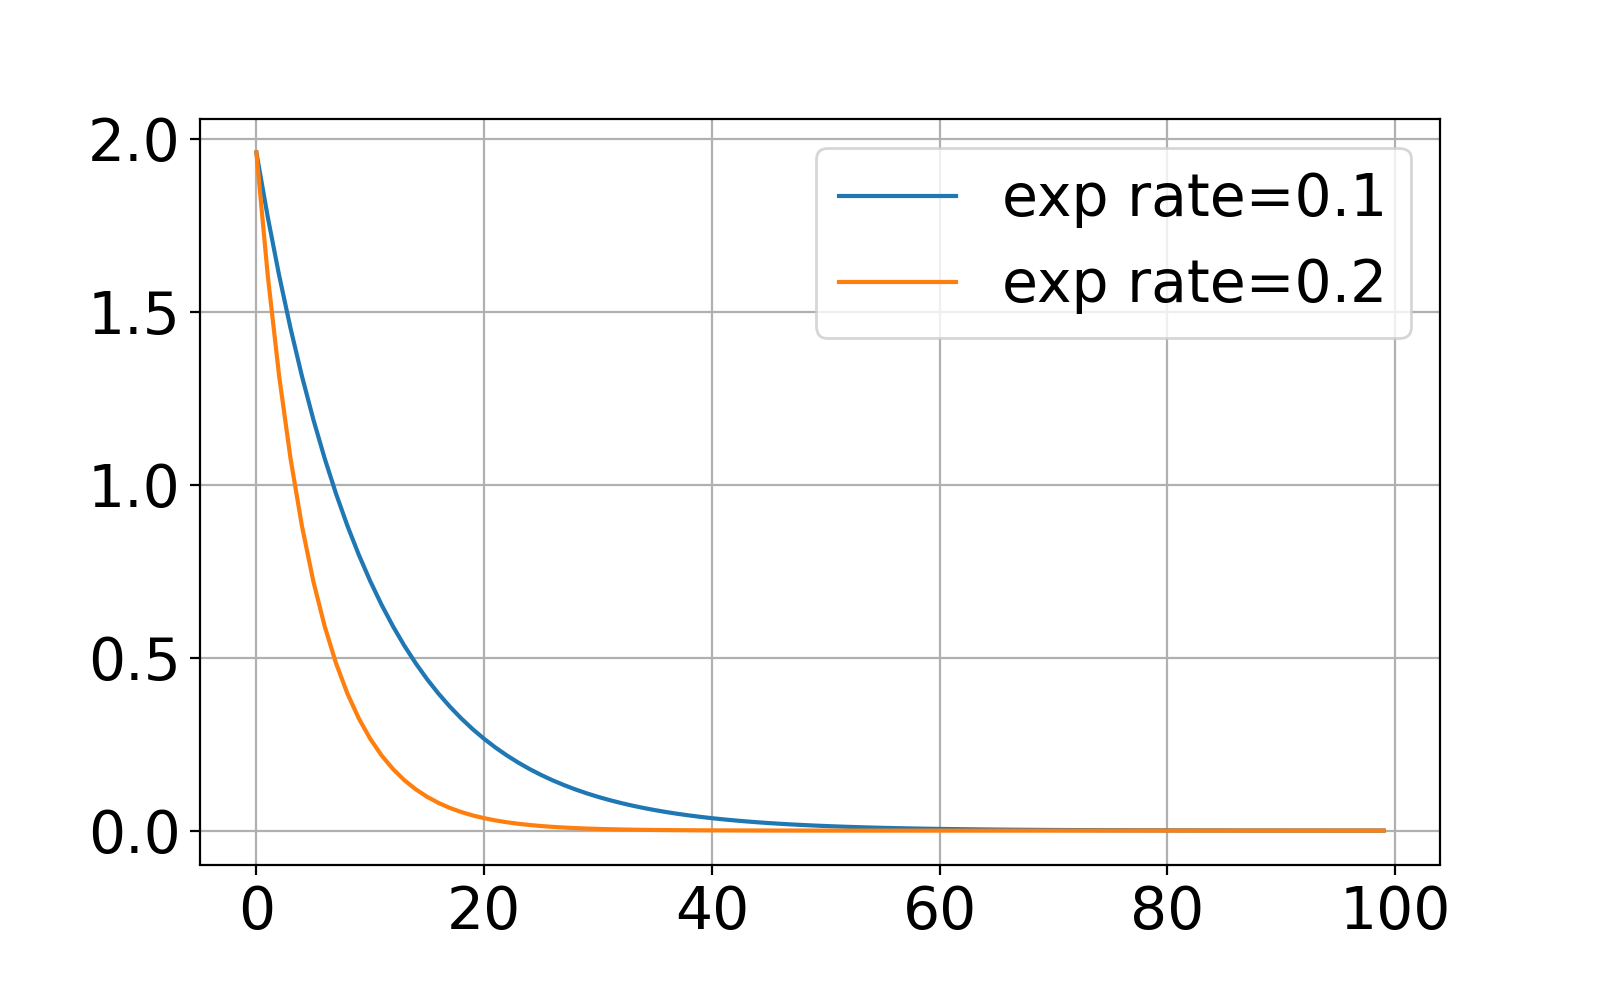

In [4]:
plt.figure()
plt.plot(y_exp_01, label="exp rate=0.1")
plt.plot(y_exp_02, label="exp rate=0.2")
# plt.plot(y_cosine_25, label="cos periode=25")
plt.grid()
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

def scheduler(kappa=1.96, i=0, decay_rate=0.1, periode=25, num_workers=10):
    random_state = np.random.RandomState(42)
#     kappa_0 = random_state.exponential(kappa, size=num_workers)
    kappa_0 = scipy.stats.truncexpon.rvs(kappa, size=10) # b=3.891
    kappa_i = kappa_0 * np.exp(-decay_rate*(i%periode))
    plt.scatter(np.zeros((num_workers,)), kappa_i)
    plt.ylim(0, kappa)
    plt.show()

interactive_plot = interactive(scheduler, i=(0,100))
interactive_plot

interactive(children=(FloatSlider(value=1.96, description='kappa', max=5.88, min=-1.96), IntSlider(value=0, de…

In [40]:
import logging

logging.basicConfig(
    # filename=path_log_file, # optional if we want to store the logs to disk
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(filename)s:%(funcName)s - %(message)s",
    force=True,
)

In [44]:
def run(config: dict):
    return -config["x"]**2



from deephyper.problem import HpProblem
from deephyper.search.hps import CBO

# define the variable you want to optimize
problem = HpProblem()
problem.add_hyperparameter((-10.0, 10.0), "x")


# define your search and execute it
scheduler = None
search = CBO(problem, run, scheduler=scheduler)

results_no_decay = search.search(max_evals=100)

2022-10-27 17:29:28,672 - INFO - _evaluator.py:create - Creating Evaluator(<function run at 0x2b092e280>, method=serial, method_kwargs={'callbacks': [<deephyper.evaluator.callback.TqdmCallback object at 0x2b0a669a0>]}...
2022-10-27 17:29:28,674 - INFO - _serial.py:__init__ - Serial Evaluator will execute run() from module __main__
2022-10-27 17:29:28,676 - INFO - _evaluator.py:create - Creation done
2022-10-27 17:29:28,681 - INFO - _cbo.py:_search - Asking 1 initial configurations...
2022-10-27 17:29:28,690 - INFO - _cbo.py:_search - Asking took 0.0089 sec.
2022-10-27 17:29:28,691 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:28,691 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:28,691 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:28,692 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:28,692 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:28,692 - INFO 

  0%|          | 0/100 [00:00<?, ?it/s]

2022-10-27 17:29:28,705 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:28,706 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0127 sec.
2022-10-27 17:29:28,706 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:28,707 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:28,707 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Dumping took 0.0011 sec.
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Transformation took 0.0001 sec.
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:28,709 - INFO - _cbo.py:_search - Fitting took 0.0001 sec.
2022-10-27 17:29:28,709 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:28,723 - INFO - _cbo.py:_search - Asking took 0.0138 sec.
2022-10-27 17:29:28,724 - INFO - _cbo.py:_search -

In [45]:
scheduler = {
    "type": "periodic-exp-decay",
    "periode": 25,
    "rate": 0.1
}
search = CBO(problem, run, scheduler=scheduler)

results_decay = search.search(max_evals=100)

2022-10-27 17:29:59,427 - INFO - _evaluator.py:create - Creating Evaluator(<function run at 0x2b092e280>, method=serial, method_kwargs={'callbacks': [<deephyper.evaluator.callback.TqdmCallback object at 0x2b09ae0a0>]}...
2022-10-27 17:29:59,428 - INFO - _serial.py:__init__ - Serial Evaluator will execute run() from module __main__
2022-10-27 17:29:59,428 - INFO - _evaluator.py:create - Creation done
2022-10-27 17:29:59,429 - INFO - _cbo.py:__init__ - Set up scheduler 'periodic-exp-decay' with parameters '{'periode': 25, 'rate': 0.1}'
2022-10-27 17:29:59,431 - INFO - _cbo.py:_search - Asking 1 initial configurations...
2022-10-27 17:29:59,438 - INFO - _cbo.py:_search - Asking took 0.0060 sec.
2022-10-27 17:29:59,438 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:59,438 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:59,439 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:59,439 - INFO - _evaluator.

  0%|          | 0/100 [00:00<?, ?it/s]

2022-10-27 17:29:59,450 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:59,450 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0103 sec.
2022-10-27 17:29:59,451 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:59,451 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:59,452 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:59,452 - INFO - _cbo.py:_search - Dumping took 0.0011 sec.
2022-10-27 17:29:59,452 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:59,452 - INFO - _cbo.py:_search - Transformation took 0.0001 sec.
2022-10-27 17:29:59,453 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 1.7734813393504807, 'xi': 0.0009048374180359595} from scheduler
2022-10-27 17:29:59,453 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:59,453 - INFO - _cbo.py:_search - Fitting took 0.0001 sec.
2022-10-27 17:29:59,453 - IN

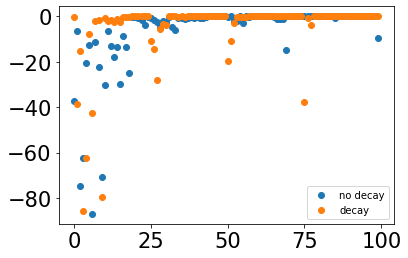

In [46]:
plt.figure()
plt.scatter(np.arange(100), results_no_decay.objective, label="no decay")
plt.scatter(np.arange(100), results_decay.objective, label="decay")
plt.legend()
plt.show()

In [7]:
41728/(128*4)

81.5

In [6]:
import numpy as np
import scipy.stats

In [7]:
np.mean(scipy.stats.truncexpon.rvs(b=3.891, size=10))

1.4427109524018777